# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

In **Part 4**, we will be building a regression model of renin inhibitors using the random forest algorithm.

## **1. Import libraries**

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

## **2. Load the data set**

In [2]:
df = pd.read_csv('renin_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Renin*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3040,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3041,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3042,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

0       7.522879
1       8.657577
2       8.602060
3       8.619789
4       5.853872
          ...   
3039    8.301030
3040    8.698970
3041    3.168770
3042    3.669586
3043    4.000000
Name: pIC50, Length: 3044, dtype: float64

### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(3044, 881)

In [6]:
Y.shape

(3044,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(3044, 140)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((2435, 140), (2435,))

In [11]:
X_test.shape, Y_test.shape

((609, 140), (609,))

## **5. Building a Regression Model using Random Forest**

In [16]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3326791981513316

In [17]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

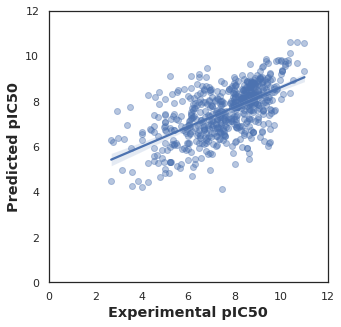

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show